# EXERCISES MACHINE LEARNING

---

## scikit-learn machine learning pipeline with validation

---

(concrete compressive strength dataset)

### Task 1 : Import libraries

Import the necessary libraries (pandas, Numpy, Matplotlib, Seaborn and scikit-learn libraries)

In [1]:
# SOLUTION
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

### Task 2 : Set Seaborn style

Choose a seaborn style for plots.

In [2]:
# SOLUTION
sns.set()

### Task 3 : Load the data

Load the 'Concrete_Data.csv' from the data directory and display the first rows.

In [4]:
# SOLUTION
df = pd.read_csv('./data/Concrete_Data.csv')
# Display the first few rows to understand the structure of the dataset
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### Task 4 : Key statistics and missing values

Understand the dataset by displaying key statistics and check for missing values

In [5]:
#SOLUTION
# Key statistics
display(df.describe())
# Count the number of missing values per column
print(df.isnull().sum())

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64


### Task 5 : Heatmap with correlations

Plot a heatmap of the correlation matrix to understand the relationships between the target variable 'csMPa' and all other variables (predictors).

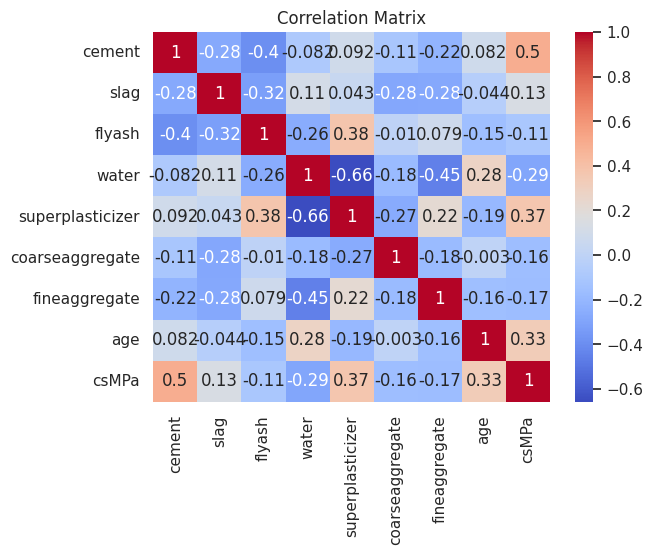

In [6]:
#SOLUTION
# plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Task 6 : Simple linear regression

Perform a simple linear regression with 'csMPa' as target and one feature.

What feature seems to be the best candidate for the job?

Use a standard test setup (training set and test set) and make the predictions 
for the observations in the test set.

In [7]:
#SOLUTION

# Select the feature (X) and the target variable (y)
# 'cement' has the highest correlation with 'csMPa' and hence is the best 
# candidate.
X = df[['cement']] # Results in a dataframe
y = df['csMPa']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a linear regression model
lin_reg_one = LinearRegression()

# Train the model
lin_reg_one.fit(X_train, y_train)

# Predict the test set
y_pred_one = lin_reg_one.predict(X_test)

### Task 7 : Validation

Calculate and display the R-squared and Mean Squared Error (MSE) for the simple linear regression.

In [8]:
#SOLUTION
print(f'R-squared (Simple Linear Regression): {r2_score(y_test, y_pred_one):.3f}')
print(f'Mean Squared Error (Simple Linear Regression): {mean_squared_error(y_test, y_pred_one):.3f}')

R-squared (Simple Linear Regression): 0.322
Mean Squared Error (Simple Linear Regression): 178.515


### Task 8 : Regression line

Plot the regression line along with the test data points and print the intercept and coefficients.

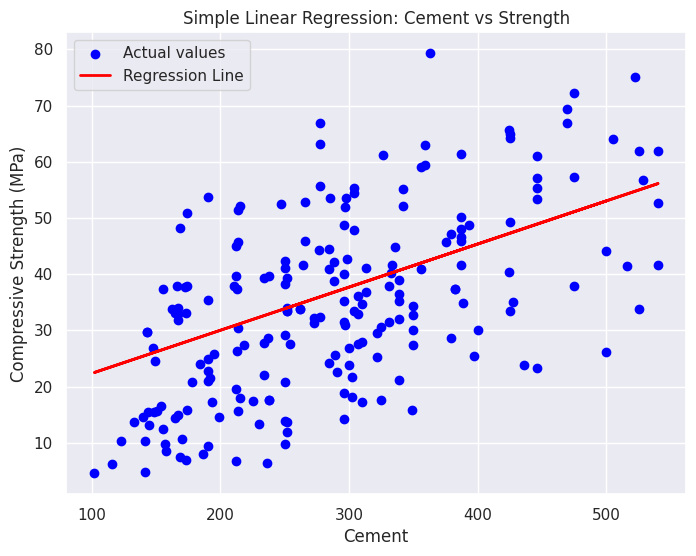

In [9]:
#SOLUTION
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.plot(X_test, y_pred_one, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Cement')
plt.ylabel('Compressive Strength (MPa)')
plt.legend()
plt.title('Simple Linear Regression: Cement vs Strength')
plt.show()

In [ ]:
#SOLUTION
print(f'Intercept    : {lin_reg_one.intercept_:.3f}')
print(f'Coefficients : {lin_reg_one.coef_}')

### Task 9 : Linear regression with more predictors

As we see the single feature explains the compressive strength not to well. We continue our search for a better model:
include more than one variable in our regression model. What other 2 features are potential good candidates?
Make predictions for the test set and calculate the Mean Squared Error and R-squared. Print the coefficients and the intercept.

In [10]:
#SOLUTION

# Let's include 'Cement', 'Water', and 'Age' as features based on their correlation with the target variable.

# Select multiple features (X) and the target variable (y)
X = df[['cement', 'water', 'age']]
y = df['csMPa']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
lin_regML = LinearRegression()

# Train the model
lin_regML.fit(X_train, y_train)

# Predict on the test set
y_predML = lin_regML.predict(X_test)

print(f'R-squared          : {r2_score(y_test, y_predML):.3f}')
print(f'Mean Squared Error : {mean_squared_error(y_test, y_predML):.3f}')
print(f'Intercept          : {lin_regML.intercept_:.3f}')
print(f'Coefficients       : {lin_regML.coef_}')
#SOLUTION_END

R-squared          : 0.500
Mean Squared Error : 128.753
Intercept          : 62.186
Coefficients       : [ 0.06770251 -0.27644885  0.10625113]


---

## scikit-learn machine learning pipeline with model selection and hyperparameter tuning using cross-validation

---

### 1. PREDICT PENGUIN SPECIES WITH HYPERPARAMETER TUNING USING CROSS-VALIDATION

We want to build a model to predict the penguin species based on some penguin characteristics we can observe. We have a labeled dataset <strong>'penguin'</strong> that is part of the Seaborn built-in datasets. We want to use a decision tree and want to experiment with following hyperparameters to find the best solution: maximum tree depth ranging from 3 tot 10, and split criterion equal to 'gini' or 'entropy'. Derive the best model, using a decision tree with the given set of hyperparameter values, using 3-fold cross validation with recall as validation measure for the hyperparameter tuning. Use <strong>species</strong> as the target variable and all other variables except <strong>island</strong> and <strong>sex</strong> as predictors.

In [ ]:
# DATA PREPARATION

import pandas as pd
pd.options.display.max_rows = None
import seaborn as sns 
df = sns.load_dataset('penguins')
y = df['species']              # Target feature to predict
X = df.copy().drop(['species','island', 'sex'], axis=1) # Predictors

print(type(df), df.shape)
print(type(X), X.shape)
print(type(y), y.shape)

display(X.head(5))
display(y.head(5))

In [ ]:
# Explore data
display(X.sample(10, random_state=0))
display(y.sample(10, random_state=0))
# Mind that the indexes of the sample of y might be different of the indexes
# of the sample of X because of the random selection.
# When using random_state with the same state, you should get the same 
# indexes.
display(X.describe())

In [ ]:
# SPLIT LABELED DATA INTO TRAIN/VALIDATE - TEST SAMPLE

from sklearn.model_selection import train_test_split
# Split the data randomly into 80% training set and 20% test set
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, random_state=0, train_size=0.8)
# (use random_state to be sure that every time the same random sample is drawn)

print(type(X_tr), X_tr.shape)
print(type(X_tst), X_tst.shape)
print(type(y_tr), y_tr.shape)
print(type(y_tst), y_tst.shape)

In [ ]:
# MODEL SELECTION AND HYPERPARAMETER TUNING (REPEAT THIS STEP FOR MULTIPLE MODELING TECHNIQUES)

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

# Define parameter grid (model specific)
grid_param = {'criterion' : ['gini', 'entropy'],
              'max_depth' : list(range(3,11))}
display(grid_param)

# Setup grid search with N-fold cross validation (e.g. 5-fold)
grid_search = GridSearchCV(model, grid_param, cv=3)

# Execute full grid search
grid_search.fit(X_tr, y_tr)

# Display best hyperparameter values and matching validation score
print(f'Best parameters : {grid_search.best_params_}')
print(f'Best score      : {grid_search.best_score_:.3f}')


In [ ]:
# DERIVE MODEL FROM TRAINING DATA USING BEST HYPERPARAMETER VALUES (TRAIN MODEL/FIT MODEL)

model.set_params(**grid_search.best_params_)
# List all selected hyperparameters
print(model.get_params(deep=True))

model.fit(X_tr,y_tr)

In [ ]:
# DISPLAY MODEL (MODEL SPECIFIC)

from sklearn.tree import plot_tree
plot_tree(model)

In [ ]:
# VALIDATE MODEL USING TEST DATA

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support, classification_report
import matplotlib.pyplot as plt

# Predict target feature for the test data
y_tst_pred = pd.Series(model.predict(X_tst), name='y_tst_pred')

# Calculate the difference between predicted and real values for the test data
err = pd.Series(y_tst_pred.reset_index(drop=True)!=y_tst.reset_index(drop=True), name='err').astype(int)
display(pd.concat([y_tst_pred.reset_index(drop=True), y_tst_pred.reset_index(drop=True), err], axis=1))

In [ ]:
# Confusion matrix
# Display as text (console output)
class_labels = sorted(list(pd.concat([y_tst,y_tst_pred], axis=0).unique()))
# Alternative : model.classes_
cm = confusion_matrix(y_true = y_tst, y_pred = y_tst_pred) 
print('Predicted label')
print(class_labels)
print(cm)
# Display as heatmap (nicer output in Jupyter)
disp = sns.heatmap(cm, square=True, annot=True, cbar=True, cmap='Greys', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
disp.xaxis.tick_top()                # Put x-axis tickers on top
disp.xaxis.set_label_position('top') # Put x-axis label on top

In [ ]:
# Metrics
acc = accuracy_score(y_true=y_tst, y_pred=y_tst_pred)
prec = precision_score(y_true=y_tst, y_pred=y_tst_pred, average='weighted')
rec = recall_score(y_true=y_tst, y_pred=y_tst_pred, average='weighted')
f1 = f1_score(y_true=y_tst, y_pred=y_tst_pred, average='weighted')
# Mind this is a multiclass classification problem, so precision, recall and F1 
# are calculated by class and averaged.
print(f'ACC : {acc:.3f} - PREC : {prec:.3f} - REC : {rec:.3f} - F1 : {f1:.3f}')

In [ ]:
# The easiest way to get results by class is to use precision_recall_fscore_support
class_labels = sorted(list(pd.concat([y_tst,y_tst_pred], axis=0).unique()))
# Alternative : model.classes_
# Display precision/recall/fscore/support table as text (consule output)
print(class_labels)
display(precision_recall_fscore_support(y_true=y_tst, y_pred=y_tst_pred))
# Display precision/recall/fscore/support as pandas dataframe (nicer outputin Jupyter)
display(pd.DataFrame(precision_recall_fscore_support(y_true=y_tst, y_pred=y_tst_pred), index=['prec','rec','fscore','sup'], columns=class_labels))

In [ ]:
# Or use classification_report
print(classification_report(y_true=y_tst, y_pred=y_tst_pred, target_names=class_labels))

### 2. PREDICT PENGUIN SPECIES WITH HYPERPARAMETER TUNING USING CROSS-VALIDATION (MANUALLY)

If everything went well, you used specific scikit-learn features for the cross validation and grid search (GridSearchCV) that do all the work (as seen in the lecture). 

In this exercise, we want you to program the procedure for the hyperparameter tuning with cross-validation yourself. So program the steps of hyperparameter tuning and cross-validation yourself, without using the cross-validation and grid search functions of scikit-learn (so do not use functions like GridSearchCV). 

Use the same data (target variable and predictors) as in the previous exercise. Find the best model using 3-fold cross validation. To make it simpler, limit the hyperparameters to be checked to split criterion equal to 'entropy' and maximum tree depth equal to 3,5,8 and 10.

The only scikit-learn functions you can use are train_test_split, the functions to derive, plot and apply a decision tree (DecisionTreeClassifier and it's methods - fit, predict - plot_tree) and the functions for the calculation of validation metrics (confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support, classification_report).

So be sure to understand the procedure for hyperparameter tuning with cross-validation (how is the data split, which iterations are needed, how are decisions on the best model taken, ...) and develop a Python program accordingly.

In [ ]:
# We do not publish a solution here because it is essential that you develop this yourself instead of just looking at the solution. You can check if your solutions is ok by comparing results with the solutions of the previous exercise.